# Проект "Основы работы с данными для ИИ"

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# A. Загрузка и первичный обзор

In [3]:
df = pd.read_csv('Winter_Fashion_Trends_Dataset.csv')

print("Первые 5 строк:")
print(df.head())
print("\nПоследние 5 строк:")
print(df.tail())

print("\nИнформация о датафрейме:")
print(df.info())

print("\nТипы данных:")
print(df.dtypes)

Первые 5 строк:
   ID       Brand Category  Color   Material       Style  Gender       Season  \
0   1      Adidas   Gloves  Brown  Polyester  Streetwear   Women  Winter 2025   
1   2       Gucci   Gloves    Red    Leather      Sporty     Men  Winter 2023   
2   3         H&M     Coat  Brown     Fleece  Streetwear  Unisex  Winter 2025   
3   4  North Face     Coat   Blue   Cashmere      Formal     Men  Winter 2024   
4   5       Mango  Thermal   Blue   Cashmere      Formal  Unisex  Winter 2025   

   Price(USD)  Popularity_Score  Customer_Rating Trend_Status  
0      244.06               6.0              4.9     Trending  
1      366.73               8.8              3.3     Trending  
2      741.55               4.8              3.5     Trending  
3      116.09               7.5              3.1     Outdated  
4      193.16               7.8              4.3     Outdated  

Последние 5 строк:
      ID   Brand Category  Color   Material   Style  Gender       Season  \
145  146   Mango 

# B. Обработка данных

In [5]:
# Пропущенные значения
print("\nКоличество пропущенных значений по столбцам:")
missing = df.isnull().sum()
print(missing)

# Стратегия: если бы были пропуски — можно заполнить, но в датасете их нет.
# Пример (закомментировано, т.к. пропусков нет):
# df['Price(USD)'].fillna(df['Price(USD)'].median(), inplace=True)
# df['Customer_Rating'].fillna(df['Customer_Rating'].mode()[0], inplace=True)

# Дубликаты
duplicates = df.duplicated()
print(f"\nКоличество дубликатов: {duplicates.sum()}")

# Удаляем дубликаты
df.drop_duplicates(inplace=True)

# Статистики данных
print("\nОписательная статистика:")
print(df.describe())

# Уникальные значения и частоты
print("\nУникальные бренды:")
print(f"{df['Brand'].nunique()} уникальных брендов")
print(df['Brand'].value_counts().head(10))

print("\nЧастота категорий:")
print(df['Category'].value_counts())

print("\nЧастота статусов трендов:")
print(df['Trend_Status'].value_counts())



Количество пропущенных значений по столбцам:
ID                  0
Brand               0
Category            0
Color               0
Material            0
Style               0
Gender              0
Season              0
Price(USD)          0
Popularity_Score    0
Customer_Rating     0
Trend_Status        0
dtype: int64

Количество дубликатов: 0

Описательная статистика:
               ID  Price(USD)  Popularity_Score  Customer_Rating
count  150.000000  150.000000        150.000000       150.000000
mean    75.500000  443.105933          5.763333         3.802667
std     43.445368  211.630074          2.655763         0.719428
min      1.000000   30.070000          1.100000         2.500000
25%     38.250000  292.807500          3.400000         3.125000
50%     75.500000  445.820000          5.850000         3.800000
75%    112.750000  631.537500          8.225000         4.400000
max    150.000000  788.030000         10.000000         5.000000

Уникальные бренды:
10 уникальных брендо

# C. Визуализация данных

In [22]:
df['Year'] = df['Season'].str[-4:].astype(int)
numeric_cols = ['Price(USD)', 'Popularity_Score', 'Customer_Rating']
corr_matrix = df[numeric_cols].corr()

## 1. Гистограмма — распределение цен

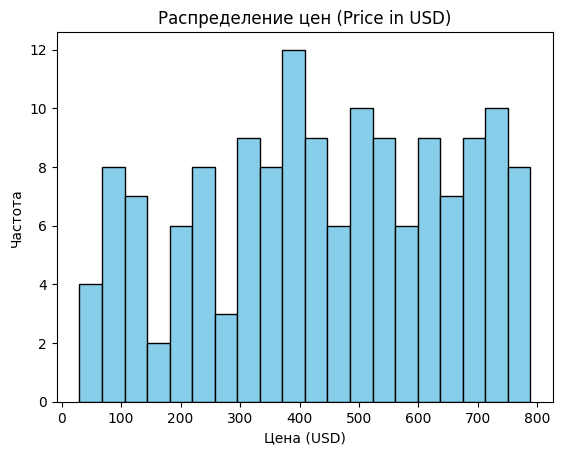

In [14]:
plt.hist(df['Price(USD)'], bins=20, color='skyblue', edgecolor='black')
plt.title('Распределение цен (Price in USD)')
plt.xlabel('Цена (USD)')
plt.ylabel('Частота')
plt.show()

## 2. Линейный график: средняя цена по годам

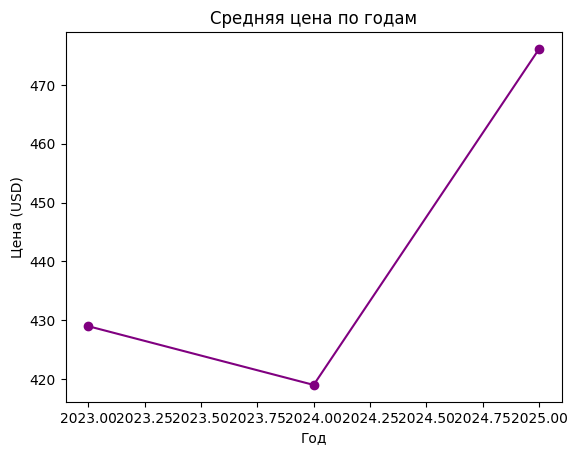

In [17]:

price_by_year = df.groupby('Year')['Price(USD)'].mean()
plt.plot(price_by_year.index, price_by_year.values, marker='o', color='purple')
plt.title('Средняя цена по годам')
plt.xlabel('Год')
plt.ylabel('Цена (USD)')
plt.show()

## 3. Столбчатая диаграмма — средний рейтинг по топ-10 брендам

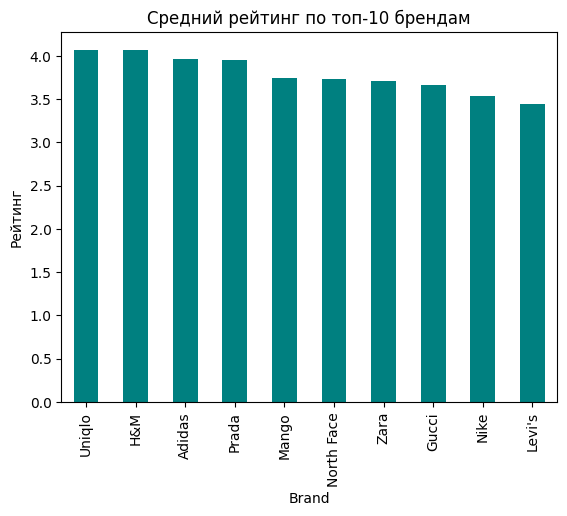

In [19]:
top_brands = df['Brand'].value_counts().index[:10]
brand_rating = df[df['Brand'].isin(top_brands)].groupby('Brand')['Customer_Rating'].mean().sort_values(ascending=False)

brand_rating.plot(kind='bar', color='teal')
plt.title('Средний рейтинг по топ-10 брендам')
plt.ylabel('Рейтинг')

plt.show()


## 4. Boxplot — цена по категориям

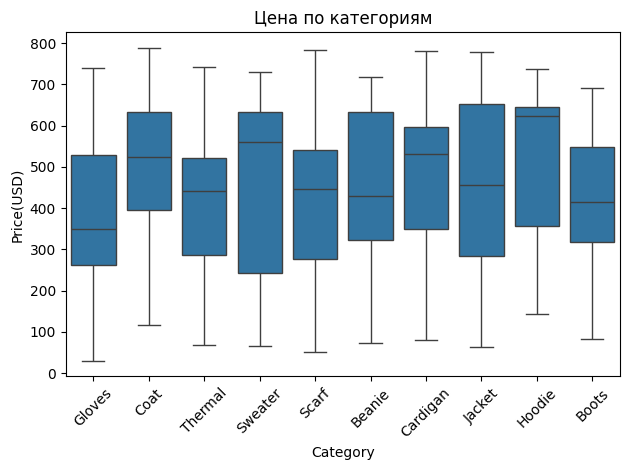

In [20]:

sns.boxplot(data=df, x='Category', y='Price(USD)')
plt.title('Цена по категориям')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

## 5. Heatmap — корреляции




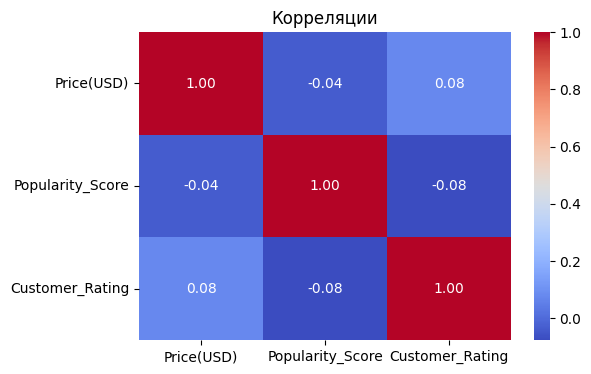

In [24]:
plt.figure(figsize=(6, 4))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', fmt='.2f')
plt.title('Корреляции')
plt.show()

# D. Группировки и агрегации

## 1. Средняя цена и рейтинг по брендам

In [25]:
brand_agg = df.groupby('Brand').agg({
    'Price(USD)': ['mean', 'median'],
    'Customer_Rating': 'mean'
}).round(2)
print("\nАгрегация по брендам (первые 5):")
print(brand_agg.head())


Агрегация по брендам (первые 5):
       Price(USD)         Customer_Rating
             mean  median            mean
Brand                                    
Adidas     565.40  555.62            3.96
Gucci      458.99  456.76            3.66
H&M        443.94  407.91            4.07
Levi's     459.95  564.06            3.45
Mango      440.22  468.58            3.74


## 2. Количество товаров по сезонам и статусу тренда

In [26]:
trend_season = df.groupby(['Season', 'Trend_Status']).size().unstack(fill_value=0)
print("\nКоличество товаров по сезонам и статусу тренда:")
print(trend_season)


Количество товаров по сезонам и статусу тренда:
Trend_Status  Classic  Emerging  Outdated  Trending
Season                                             
Winter 2023        11         6        12        13
Winter 2024         9        13        20        10
Winter 2025         8        11        18        19


## 3. Сводная таблица: средняя популярность по категории и полу

In [27]:
pivot = pd.pivot_table(df, values='Popularity_Score', index='Category', columns='Gender', aggfunc='mean')
print("\nСводная таблица: популярность по категории и полу:")
print(pivot)


Сводная таблица: популярность по категории и полу:
Gender         Men    Unisex     Women
Category                              
Beanie    7.100000  3.400000  6.214286
Boots     6.850000  7.300000  6.900000
Cardigan  3.375000  7.566667  4.550000
Coat      7.133333  6.550000  2.350000
Gloves    5.500000  8.283333  4.442857
Hoodie    5.200000  7.450000  4.228571
Jacket    6.125000  5.000000  5.075000
Scarf     5.150000  5.850000  5.242857
Sweater   5.550000  7.600000  6.750000
Thermal   6.360000  5.540000  2.725000
